In [ ]:
# Impoting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from numpy import array
import seaborn as sns

In [ ]:
Cirrhosis=pd.read_csv("cirrhosis.csv")
Cirrhosis

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,414,681,D,NaN,24472,F,NaN,NaN,NaN,N,1.2,NaN,2.96,NaN,NaN,NaN,NaN,174.0,10.9,3.0
414,415,1103,C,NaN,14245,F,NaN,NaN,NaN,N,0.9,NaN,3.83,NaN,NaN,NaN,NaN,180.0,11.2,4.0
415,416,1055,C,NaN,20819,F,NaN,NaN,NaN,N,1.6,NaN,3.42,NaN,NaN,NaN,NaN,143.0,9.9,3.0
416,417,691,C,NaN,21185,F,NaN,NaN,NaN,N,0.8,NaN,3.75,NaN,NaN,NaN,NaN,269.0,10.4,3.0


In [ ]:
Cirrhosis.shape

(418, 20)

In [ ]:
Cirrhosis.dtypes

ID                 int64
N_Days             int64
Status            object
Drug              object
Age                int64
Sex               object
Ascites           object
Hepatomegaly      object
Spiders           object
Edema             object
Bilirubin        float64
Cholesterol      float64
Albumin          float64
Copper           float64
Alk_Phos         float64
SGOT             float64
Tryglicerides    float64
Platelets        float64
Prothrombin      float64
Stage            float64
dtype: object

In [ ]:
Cirrhosis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             418 non-null    int64  
 1   N_Days         418 non-null    int64  
 2   Status         418 non-null    object 
 3   Drug           312 non-null    object 
 4   Age            418 non-null    int64  
 5   Sex            418 non-null    object 
 6   Ascites        312 non-null    object 
 7   Hepatomegaly   312 non-null    object 
 8   Spiders        312 non-null    object 
 9   Edema          418 non-null    object 
 10  Bilirubin      418 non-null    float64
 11  Cholesterol    284 non-null    float64
 12  Albumin        418 non-null    float64
 13  Copper         310 non-null    float64
 14  Alk_Phos       312 non-null    float64
 15  SGOT           312 non-null    float64
 16  Tryglicerides  282 non-null    float64
 17  Platelets      407 non-null    float64
 18  Prothrombi

In [ ]:
Cirrhosis = Cirrhosis.drop(["ID"],axis="columns")
Cirrhosis = Cirrhosis.drop(["N_Days"],axis="columns")
Cirrhosis = Cirrhosis.drop(["Status"],axis="columns")
Cirrhosis

,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,NaN,24472,F,NaN,NaN,NaN,N,1.2,NaN,2.96,NaN,NaN,NaN,NaN,174.0,10.9,3.0
414,NaN,14245,F,NaN,NaN,NaN,N,0.9,NaN,3.83,NaN,NaN,NaN,NaN,180.0,11.2,4.0
415,NaN,20819,F,NaN,NaN,NaN,N,1.6,NaN,3.42,NaN,NaN,NaN,NaN,143.0,9.9,3.0
416,NaN,21185,F,NaN,NaN,NaN,N,0.8,NaN,3.75,NaN,NaN,NaN,NaN,269.0,10.4,3.0


In [ ]:
Cirrhosis.isnull().sum()

Drug             106
Age                0
Sex                0
Ascites          106
Hepatomegaly     106
Spiders          106
Edema              0
Bilirubin          0
Cholesterol      134
Albumin            0
Copper           108
Alk_Phos         106
SGOT             106
Tryglicerides    136
Platelets         11
Prothrombin        2
Stage              6
dtype: int64

In [ ]:
Cirrhosis.dropna(inplace=True)

In [ ]:
Cirrhosis.isnull().sum()

Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
dtype: int64

In [ ]:
Cirrhosis

,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,D-penicillamine,22347,F,N,Y,N,N,0.4,246.0,3.58,24.0,797.0,91.00,113.0,288.0,10.4,2.0
308,Placebo,21294,F,N,N,N,N,0.4,260.0,2.75,41.0,1166.0,70.00,82.0,231.0,10.8,2.0
309,D-penicillamine,22767,F,N,N,N,N,1.7,434.0,3.35,39.0,1713.0,171.00,100.0,234.0,10.2,2.0
310,D-penicillamine,13879,F,N,N,N,N,2.0,247.0,3.16,69.0,1050.0,117.00,88.0,335.0,10.5,2.0


In [ ]:
Y = Cirrhosis[['Stage']]
Y

,Stage
0,4.0
1,3.0
2,4.0
3,4.0
4,3.0
...,...
307,2.0
308,2.0
309,2.0
310,2.0


In [ ]:
X1=Cirrhosis.drop(columns=['Stage'])

In [ ]:
X1

,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin
0,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2
1,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6
2,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0
3,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3
4,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,D-penicillamine,22347,F,N,Y,N,N,0.4,246.0,3.58,24.0,797.0,91.00,113.0,288.0,10.4
308,Placebo,21294,F,N,N,N,N,0.4,260.0,2.75,41.0,1166.0,70.00,82.0,231.0,10.8
309,D-penicillamine,22767,F,N,N,N,N,1.7,434.0,3.35,39.0,1713.0,171.00,100.0,234.0,10.2
310,D-penicillamine,13879,F,N,N,N,N,2.0,247.0,3.16,69.0,1050.0,117.00,88.0,335.0,10.5


In [ ]:
# converting object data to integer
'''
labelencoder_X=LabelEncoder()
X=X1.apply(LabelEncoder().fit_transform)
'''

obj_col=['Drug','Sex','Ascites','Hepatomegaly','Spiders','Edema']
X = pd.get_dummies(X1,columns=obj_col,drop_first=True)
X

,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Drug_Placebo,Sex_M,Ascites_Y,Hepatomegaly_Y,Spiders_Y,Edema_S,Edema_Y
0,21464,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,0,0,1,1,1,0,1
1,20617,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,0,0,0,1,1,0,0
2,25594,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,0,1,0,0,0,1,0
3,19994,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,0,0,0,1,1,1,0
4,13918,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,1,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,22347,0.4,246.0,3.58,24.0,797.0,91.00,113.0,288.0,10.4,0,0,0,1,0,0,0
308,21294,0.4,260.0,2.75,41.0,1166.0,70.00,82.0,231.0,10.8,1,0,0,0,0,0,0
309,22767,1.7,434.0,3.35,39.0,1713.0,171.00,100.0,234.0,10.2,0,0,0,0,0,0,0
310,13879,2.0,247.0,3.16,69.0,1050.0,117.00,88.0,335.0,10.5,0,0,0,0,0,0,0


In [ ]:
print("Feature data dimension: ", X.shape)

Feature data dimension:  (276, 17)


In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

select = SelectKBest(score_func=chi2, k=12)
z = select.fit_transform(X,Y)

print("After selecting best 3 features:", z.shape)

After selecting best 3 features: (276, 12)


In [ ]:
filter = select.get_support()
features = array(X.columns)

print("All features:")
print(features)

print("Selected best 14:")
print(features[filter])

All features:
['Age' 'Bilirubin' 'Cholesterol' 'Albumin' 'Copper' 'Alk_Phos' 'SGOT'
 'Tryglicerides' 'Platelets' 'Prothrombin' 'Drug_Placebo' 'Sex_M'
 'Ascites_Y' 'Hepatomegaly_Y' 'Spiders_Y' 'Edema_S' 'Edema_Y']
Selected best 14:
['Age' 'Bilirubin' 'Cholesterol' 'Copper' 'Alk_Phos' 'SGOT'
 'Tryglicerides' 'Platelets' 'Ascites_Y' 'Hepatomegaly_Y' 'Spiders_Y'
 'Edema_Y']


In [ ]:
features = array(Cirrhosis.columns)

print("All features:")
print(features)

All features:
['Drug' 'Age' 'Sex' 'Ascites' 'Hepatomegaly' 'Spiders' 'Edema' 'Bilirubin'
 'Cholesterol' 'Albumin' 'Copper' 'Alk_Phos' 'SGOT' 'Tryglicerides'
 'Platelets' 'Prothrombin' 'Stage']


In [ ]:
Cirrhosis=pd.get_dummies(data=Cirrhosis,drop_first=True)
Cirrhosis

,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Drug_Placebo,Sex_M,Ascites_Y,Hepatomegaly_Y,Spiders_Y,Edema_S,Edema_Y
0,21464,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0,0,0,1,1,1,0,1
1,20617,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0,0,0,0,1,1,0,0
2,25594,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0,0,1,0,0,0,1,0
3,19994,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0,0,0,0,1,1,1,0
4,13918,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0,1,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,22347,0.4,246.0,3.58,24.0,797.0,91.00,113.0,288.0,10.4,2.0,0,0,0,1,0,0,0
308,21294,0.4,260.0,2.75,41.0,1166.0,70.00,82.0,231.0,10.8,2.0,1,0,0,0,0,0,0
309,22767,1.7,434.0,3.35,39.0,1713.0,171.00,100.0,234.0,10.2,2.0,0,0,0,0,0,0,0
310,13879,2.0,247.0,3.16,69.0,1050.0,117.00,88.0,335.0,10.5,2.0,0,0,0,0,0,0,0


In [ ]:
corr_C=Cirrhosis[['Age','Bilirubin','Cholesterol','Albumin','Copper','Alk_Phos','SGOT','Tryglicerides','Platelets','Prothrombin','Stage','Drug_Placebo','Sex_M','Ascites_Y','Hepatomegaly_Y','Spiders_Y','Edema_S','Edema_Y']].corr()

In [ ]:
corr_C['Stage'].sort_values().iloc[1:-1]

Platelets        -0.221546
Cholesterol       0.004573
Alk_Phos          0.016821
Sex_M             0.034206
Drug_Placebo      0.080087
Edema_S           0.118525
Tryglicerides     0.126033
SGOT              0.142341
Age               0.178980
Prothrombin       0.233990
Edema_Y           0.235527
Bilirubin         0.247861
Copper            0.280346
Ascites_Y         0.306251
Spiders_Y         0.316755
Hepatomegaly_Y    0.479132
Name: Stage, dtype: float64

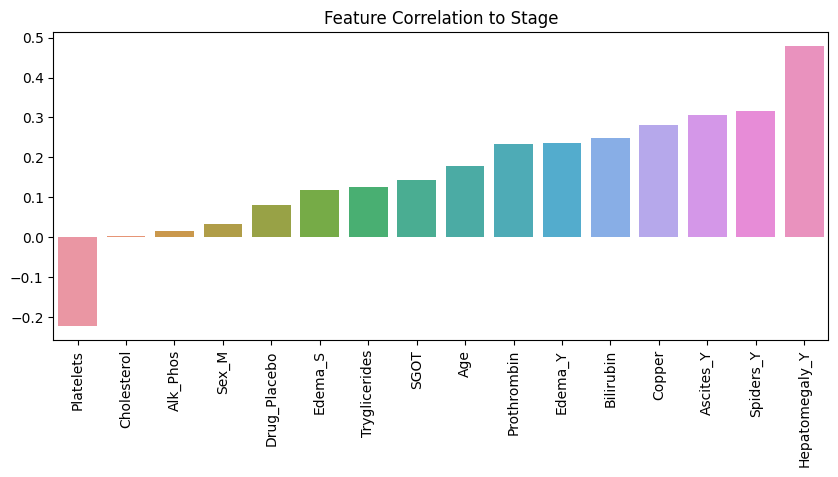

In [ ]:
plt.figure(figsize=(10,4),dpi=100)
sns.barplot(x=corr_C['Stage'].sort_values().iloc[1:-1].index,y=corr_C['Stage'].sort_values().iloc[1:-1].values)
plt.title("Feature Correlation to Stage")
plt.xticks(rotation=90);

In [ ]:
X

,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Drug_Placebo,Sex_M,Ascites_Y,Hepatomegaly_Y,Spiders_Y,Edema_S,Edema_Y
0,21464,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,0,0,1,1,1,0,1
1,20617,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,0,0,0,1,1,0,0
2,25594,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,0,1,0,0,0,1,0
3,19994,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,0,0,0,1,1,1,0
4,13918,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,1,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,22347,0.4,246.0,3.58,24.0,797.0,91.00,113.0,288.0,10.4,0,0,0,1,0,0,0
308,21294,0.4,260.0,2.75,41.0,1166.0,70.00,82.0,231.0,10.8,1,0,0,0,0,0,0
309,22767,1.7,434.0,3.35,39.0,1713.0,171.00,100.0,234.0,10.2,0,0,0,0,0,0,0
310,13879,2.0,247.0,3.16,69.0,1050.0,117.00,88.0,335.0,10.5,0,0,0,0,0,0,0


In [ ]:
X = X.drop(["Albumin"],axis="columns")
X = X.drop(["Platelets"],axis="columns")
X = X.drop(["Cholesterol"],axis="columns")
X = X.drop(["Alk_Phos"],axis="columns")
X = X.drop(["Sex_M"],axis="columns")
X

,Age,Bilirubin,Copper,SGOT,Tryglicerides,Prothrombin,Drug_Placebo,Ascites_Y,Hepatomegaly_Y,Spiders_Y,Edema_S,Edema_Y
0,21464,14.5,156.0,137.95,172.0,12.2,0,1,1,1,0,1
1,20617,1.1,54.0,113.52,88.0,10.6,0,0,1,1,0,0
2,25594,1.4,210.0,96.10,55.0,12.0,0,0,0,0,1,0
3,19994,1.8,64.0,60.63,92.0,10.3,0,0,1,1,1,0
4,13918,3.4,143.0,113.15,72.0,10.9,1,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
307,22347,0.4,24.0,91.00,113.0,10.4,0,0,1,0,0,0
308,21294,0.4,41.0,70.00,82.0,10.8,1,0,0,0,0,0
309,22767,1.7,39.0,171.00,100.0,10.2,0,0,0,0,0,0
310,13879,2.0,69.0,117.00,88.0,10.5,0,0,0,0,0,0


In [ ]:
best_accuracy = 0
best_random_state = None
for random_state in range(1,200):
  X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=random_state)


  model = GaussianNB()
  model.fit(X_train,Y_train)

  y_pred = model.predict(X_test)

  accuracy = accuracy_score(Y_test,y_pred)

  if accuracy > best_accuracy:
    best_accuracy = accuracy
    best_random_state = random_state

print("Best Accuracy : ",best_accuracy )
print("Best Random State : ",best_random_state )

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Best Accuracy :  0.5
Best Random State :  142


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.25,random_state=142)
len(x_train),len(x_test),len(y_train),len(y_test)

(207, 69, 207, 69)

In [ ]:
naive=GaussianNB()
naive_model=naive.fit(x_train,y_train)
naive_model
print('The model has ran Successfully!!')

The model has ran Successfully!!


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
y_test['Predicted_NB'] = naive_model.predict(x_test)

In [ ]:
y_test

,Stage,Predicted_NB
201,2.0,1.0
1,3.0,3.0
291,3.0,3.0
178,4.0,2.0
268,2.0,2.0
...,...,...
137,3.0,3.0
288,2.0,3.0
253,3.0,3.0
238,4.0,3.0


In [ ]:
print(confusion_matrix(y_test['Stage'],y_test['Predicted_NB']))

[[ 5  2  1  0]
 [ 3  9  6  0]
 [ 2  6 12  2]
 [ 0  2 10  9]]


In [ ]:
accuracy_NB = accuracy_score(y_test['Stage'],y_test['Predicted_NB'])
accuracy_NB = np.round(accuracy_NB,2)
print('The Accuracy of Naive Bays Calssification model is: ',accuracy_NB)

The Accuracy of Naive Bays Calssification model is:  0.51


In [ ]:
regressor = DecisionTreeClassifier(criterion = 'gini',max_depth=4,splitter='best')
regressor.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=4)

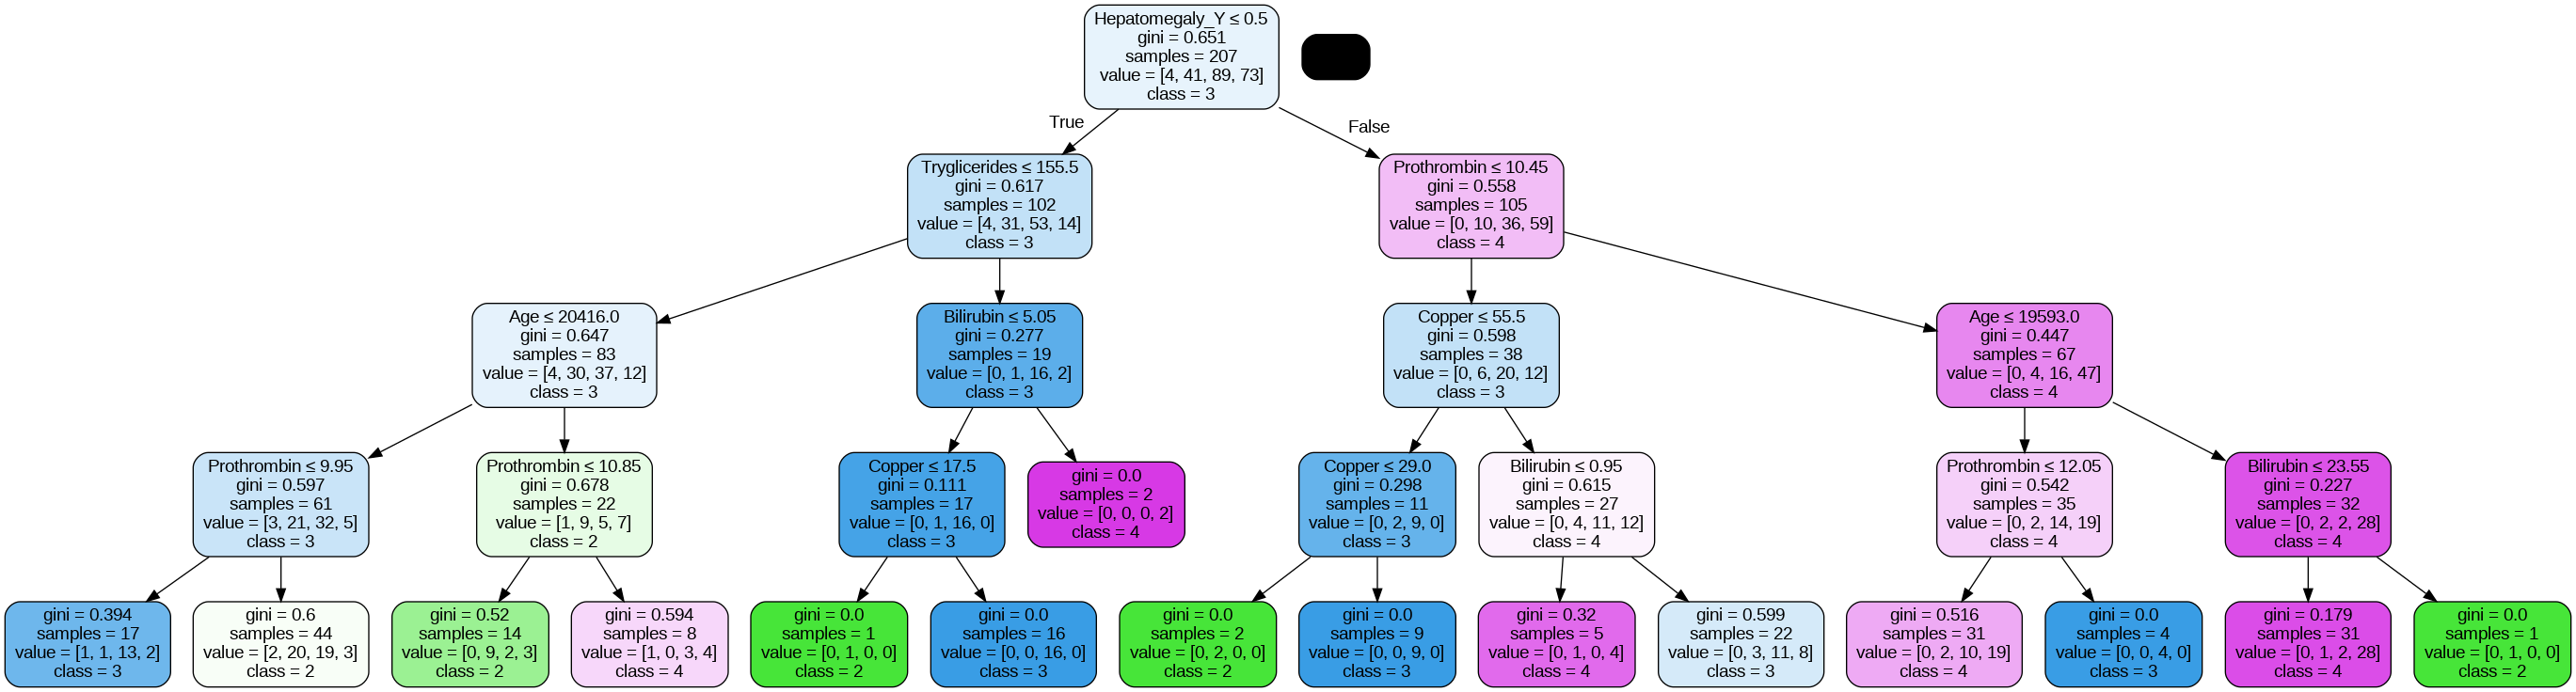

In [ ]:
'''from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
dot_data=StringIO()
feature_cols=['Drug','Age','Sex','Ascites','Hepatomegaly','Spiders','Edema','Bilirubin',
              'Cholesterol','Albumin','Copper','Alk_Phos','SGOT',
              'Tryglicerides','Platelets','Prothrombin']
export_graphviz(regressor, out_file=dot_data, filled=True ,rounded=True, special_characters=True, feature_names=feature_cols, class_names=['1','2','3','4'])
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())
'''

from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
dot_data=StringIO()
feature_cols=['Age','Bilirubin','Copper','SGOT',
              'Tryglicerides','Prothrombin','Drug_Placebo','Ascites_Y',
             'Hepatomegaly_Y','Spiders_Y','Edema_S','Edema_Y']
export_graphviz(regressor, out_file=dot_data, filled=True ,rounded=True, special_characters=True, feature_names=feature_cols, class_names=['1','2','3','4'])
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [ ]:
y_test['Predicted_DT'] = regressor.predict(x_test)

In [ ]:
y_test

,Stage,Predicted_NB,Predicted_DT
201,2.0,1.0,2.0
1,3.0,3.0,4.0
291,3.0,3.0,4.0
178,4.0,2.0,3.0
268,2.0,2.0,2.0
...,...,...,...
137,3.0,3.0,4.0
288,2.0,3.0,3.0
253,3.0,3.0,3.0
238,4.0,3.0,4.0


In [ ]:
print(confusion_matrix(y_test['Stage'],y_test['Predicted_DT']))

[[ 0  5  2  1]
 [ 0 10  7  1]
 [ 0  6  7  9]
 [ 0  0  6 15]]


In [ ]:
accuracy_DT= accuracy_score(y_test['Stage'],y_test['Predicted_DT'])
accuracy_DT = np.round(accuracy_DT,2)
print('The Accuracy of Decision Tree Classifier model is: ',accuracy_DT)

The Accuracy of Decision Tree Classifier model is:  0.46
